## Infos
### Transactions (20.712.225 linhas)

| Campo | Tipo | Observações | Analisado |
|-------|------|-------------|-----------|
| msno | String | Sem valores nulos | ✅ |
| payment_method_id | Int (categoria) | Sem valores nulos, 40 métodos | ✅ |
| payment_plan_days | Int | Sem valores nulos | ✅ |
| plan_list_price | Int | Sem valores nulos, 51 valores de planos | ✅ |
| actual_amount_paid | Int | Sem valores nulos | ✅ |
| is_auto_renew | Boolean | Sem valores nulos | ✅ |
| transaction_date | Datetime | Sem valores nulos | ✅ |
| membership_expire_date | Datetime | Sem valores nulos | ✅ |
| is_cancel | Boolean | Sem valores nulos | ✅ |
| safra | Datetime (ano + mês do campo transaction_date) | Sem valores nulos | ✅ |

<br>

**TODO**<br>
- Podemos remover o campo `safra` pois ele está contido em `transaction_date`
- Separar campos Datetime em ano, mês e dia
- Criar um campo de "desconto": diferença entre o plano do preço e o valor pago
- Remover outliers do campo `membership_expire_date`
- Criar coluna preço / mês

__________
### Members (63.867.246 linhas)
| Campo | Tipo | Observações | Analisado |
|-------|------|-------------|-----------|
| msno | String | Sem valores nulos | ✅ |
| safra | Datetime (YYYYMM) | Sem valores nulos, vai até 201612 | ✅ |
| registration_init_time | Datetime | Sem valores nulos | ✅ |
| city | Int (categoria) | Sem valores nulos | ✅ |
| bd | Int | Sem valores nulos | ✅ |
| gender | String / Nulo (categoria) | Possui valores nulos | ✅ |
| registered_via | Int (categoria) | Sem valores nulos | ✅ |
| is_ativo | Boolean | Sem valores nulos, grande maioria inativa | ✅ |

<br>

**TODO**<br>
- Renomear "is_ativo" para "is_active" para manter o padrão de nomenclatura
- Separar campos Datetime em ano, mês e dia
- Tratar campo "gender" marcado como nulo
- Remover outliers de `bd` + tratar valores 0 (grande maioria)

__________
### User logs (26.758.971 linhas)
| Campo | Tipo | Observações | Analisado |
|-------|------|-------------|-----------|
| msno | String | Há valores repetidos | |
| safra | Integer | | |
| num_25 | Integer | | |
| num_50 | Integer | | |
| num_75 | Integer | | |
| num_985 | Integer | | |
| num_100 | Integer | | |
| num_unq | Integer | | |
| total_secs | Float | | |

<br>

**TODO**<br>
- Transformar campo safra de data para
- Separar campos Datetime em ano, mês e dia

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Utils.DataLoader import DataLoader
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_LOADER = DataLoader()

In [4]:
def check_if_float_field_is_integer(df: pd.DataFrame, field: str) -> bool:
    calc = (df[field].astype(int) == df[field]).value_counts()
    return False not in calc.keys()

# Transactions

In [6]:
transactions_df = DATA_LOADER.load_transactions_df()

In [7]:
print(f'Rows qty: {len(transactions_df)}')

Rows qty: 20712225


In [7]:
transactions_df.dtypes

msno                              object
payment_method_id                  int64
payment_plan_days                  int64
plan_list_price                    int64
actual_amount_paid                 int64
is_auto_renew                       bool
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
is_cancel                           bool
dtype: object

In [ ]:
# # Checking if safra is inside transaction_date column
# # If yes, we can remove this field
# for index, row in transactions_df.iterrows():
#     if str(row['safra']) not in str(row['transaction_date']):
#         print(f'Found! {row}')

In [8]:
transactions_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,38,410,1788,1788,False,2015-11-21,2017-01-04,False
1,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,30,149,149,True,2015-05-26,2015-06-26,False
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,30,149,149,True,2015-09-26,2015-10-26,False
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,41,30,149,149,True,2016-06-15,2016-07-15,False
4,++/Gw1B9K+XOlB3hLTloeUK2QlCa2m+BJ8TrzGf7djI=,40,31,149,149,True,2015-01-13,2015-02-16,False


In [18]:
transactions_df.isna().sum()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

In [17]:
transactions_df.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,transaction_date,membership_expire_date
count,2.071222e+07,2.071222e+07,2.071222e+07,2.071222e+07,20712225,20712225
mean,3.892650e+01,3.142900e+01,1.402409e+02,1.428347e+02,2016-03-12 01:00:59.224674560,2016-04-15 15:00:59.945293568
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015-01-01 00:00:00,1970-01-01 00:00:00
25%,3.800000e+01,3.000000e+01,9.900000e+01,9.900000e+01,2015-09-09 00:00:00,2015-10-19 00:00:00
50%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,2016-03-26 00:00:00,2016-05-03 00:00:00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,2016-09-28 00:00:00,2016-10-31 00:00:00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,2017-02-28 00:00:00,2017-03-31 00:00:00
std,3.506286e+00,3.055983e+01,1.322768e+02,1.336094e+02,NaN,NaN


<Axes: xlabel='transaction_date'>

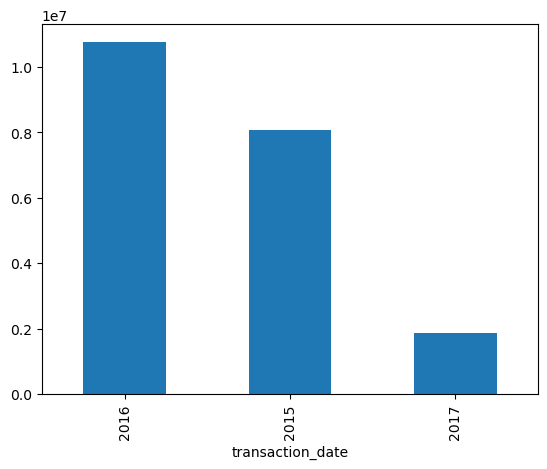

In [12]:
transactions_df.transaction_date.dt.year.value_counts().plot.bar()

<Axes: xlabel='is_auto_renew'>

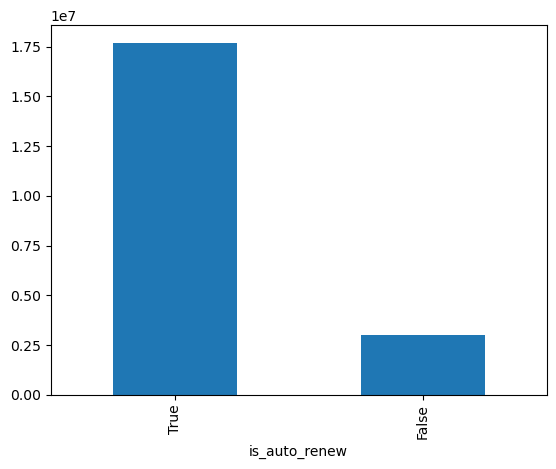

In [11]:
transactions_df.is_auto_renew.value_counts().plot.bar()

(is_cancel
 False    20031271
 True       680954
 Name: count, dtype: int64,
 <Axes: xlabel='is_cancel'>)

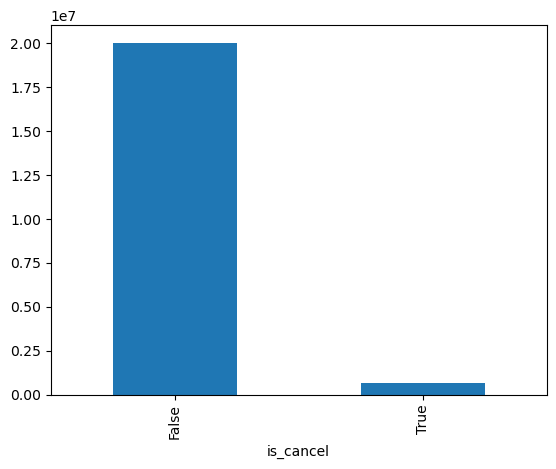

In [14]:
transactions_df.is_cancel.value_counts(), transactions_df.is_cancel.value_counts().plot.bar()

In [16]:
transactions_df.membership_expire_date.dt.year.value_counts()

membership_expire_date
2016    10662667
2015     7038483
2017     3003853
2014        3553
2013        2146
1970        1499
2012          12
2010           3
2007           3
1999           2
2009           2
2005           1
2008           1
Name: count, dtype: int64

In [21]:
len(transactions_df.payment_method_id.unique())

40

In [27]:
len(transactions_df.plan_list_price.unique())

51

In [32]:
len(transactions_df.plan_list_price.value_counts())

51

In [37]:
transactions_df.payment_plan_days.unique()

array([410,  30,  31,   7,   0, 395, 180,  45, 195,  60,  10, 120, 100,
       360, 200,  90,  14,   1,  99, 110,  35, 400,  21, 450, 240,  66,
        70, 365,  80, 270,   3,  15, 230,   2,  95, 425, 415])

(actual_amount_paid
 149     11998045
 99       4776059
 129      1124259
 0        1047843
 180       656705
 150       373391
 119       322854
 894       111410
 1788       82809
 100        76237
 536        44129
 480        22927
 1599       11991
 477        10752
 799         6422
 300         5496
 1200        5313
 298         5167
 930         5063
 134         4625
 120         4462
 35          4352
 447         3831
 450         1379
 500         1117
 699          887
 50           751
 1000         741
 124          596
 131          571
 350          568
 400          316
 105          259
 70           195
 143          129
 2000         119
 1            111
 1150          95
 596           64
 10            54
 15            35
 127           29
 265           20
 1520          13
 800           11
 41             4
 600            3
 30             3
 210            3
 760            2
 1825           2
 849            1
 45             1
 1800           1
 890    

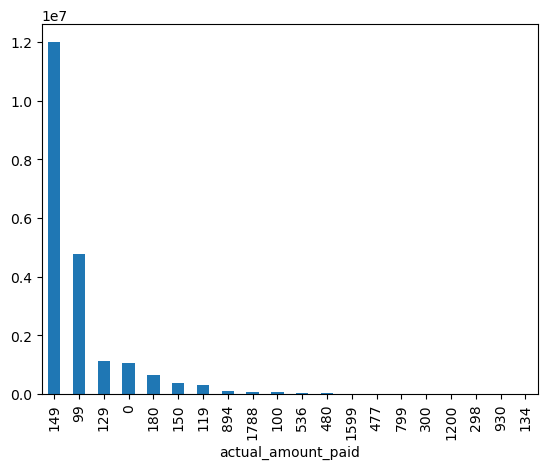

In [41]:
transactions_df.actual_amount_paid.value_counts(), transactions_df.actual_amount_paid.value_counts()[:20].plot.bar()

# Members

In [4]:
members_df = DATA_LOADER.load_members_df()

In [4]:
print(f'Rows qty: {len(members_df)}')

Rows qty: 63867246


In [5]:
members_df.dtypes

msno                              object
safra                             object
registration_init_time    datetime64[ns]
city                            category
bd                                 int64
gender                          category
registered_via                  category
is_ativo                            bool
dtype: object

In [6]:
members_df.head()

,msno,safra,registration_init_time,city,bd,gender,registered_via,is_ativo
0,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,201612,2014-09-27,1,0,NaN,7,True
1,++/AwGzubug3gT6J+0STBGMdWKxaM+UFZTI8Tcmq4To=,201607,2015-03-22,1,0,NaN,9,False
2,++/Gw1B9K+XOlB3hLTloeUK2QlCa2m+BJ8TrzGf7djI=,201601,2012-12-17,15,32,male,3,True
3,++02XbtviomSxcIBUHMOiJkjRxdicTXSfiVqLdsr5lo=,201603,2013-11-12,14,21,male,7,False
4,++0O0Bq04sB/9ZcOS+pajpYL2Hin9jCqnc/8bKzKFuE=,201610,2014-10-21,5,33,male,3,False


In [12]:
members_df.isna().sum()

msno                             0
safra                            0
registration_init_time           0
city                             0
bd                               0
gender                    38210177
registered_via                   0
is_ativo                         0
dtype: int64

In [7]:
members_df.describe()

,registration_init_time,bd
count,63867246,6.386725e+07
mean,2014-06-10 23:17:42.231807232,1.143016e+01
min,2004-03-26 00:00:00,-7.168000e+03
25%,2013-10-20 00:00:00,0.000000e+00
50%,2015-03-15 00:00:00,0.000000e+00
75%,2015-12-25 00:00:00,2.400000e+01
max,2016-12-31 00:00:00,2.016000e+03
std,NaN,1.904132e+01


In [8]:
# Less values than the total rows
len(members_df.msno.unique())

6287789

<Axes: xlabel='registration_init_time'>

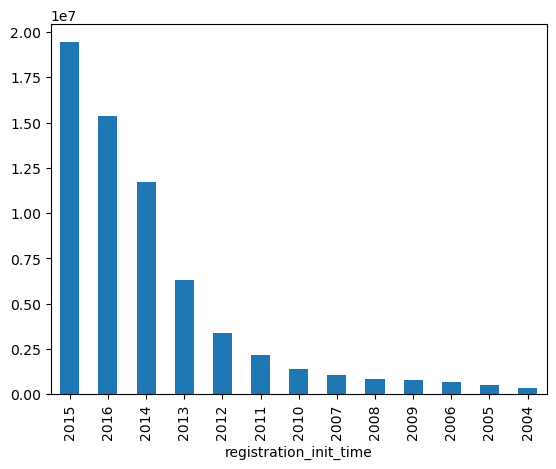

In [10]:
members_df.registration_init_time.dt.year.value_counts().plot.bar()

<Axes: xlabel='registration_init_time'>

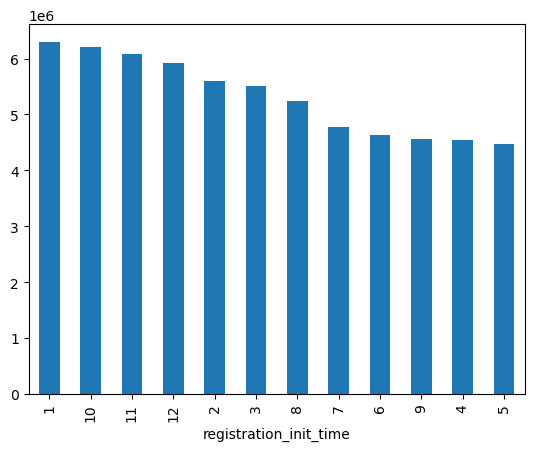

In [11]:
members_df.registration_init_time.dt.month.value_counts().plot.bar()

<Axes: xlabel='city'>

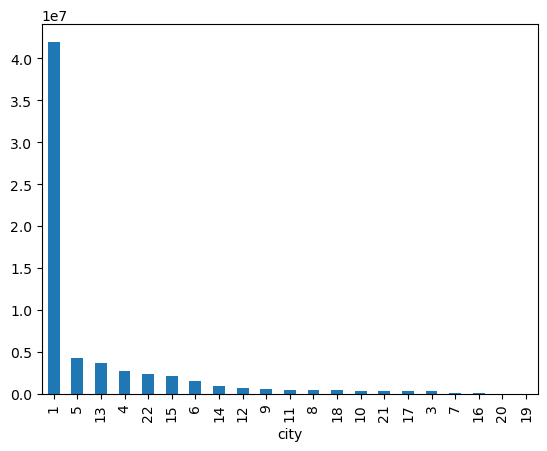

In [15]:
members_df.city.value_counts().plot.bar()

In [19]:
members_df.bd.value_counts()

bd
 0       39509864
 22       1220332
 21       1196188
 20       1183935
 27       1136339
           ...   
-497            2
-507            1
 1421           1
-501            1
-527            1
Name: count, Length: 385, dtype: int64

In [23]:
members_df.gender.value_counts()

gender
male      13075425
female    12581644
Name: count, dtype: int64

In [24]:
members_df.gender.isna().sum()

np.int64(38210177)

In [25]:
members_df.registered_via.value_counts()

registered_via
4     19648219
3     18640987
9     16776651
7      8407395
11      269614
8        47588
5        18715
2        16847
16       10564
13        7546
14        7111
17        6630
19        5629
6         3380
1          254
10         104
-1          12
Name: count, dtype: int64

In [26]:
members_df.is_ativo.value_counts()

is_ativo
False    52624381
True     11242865
Name: count, dtype: int64

<Axes: xlabel='is_ativo'>

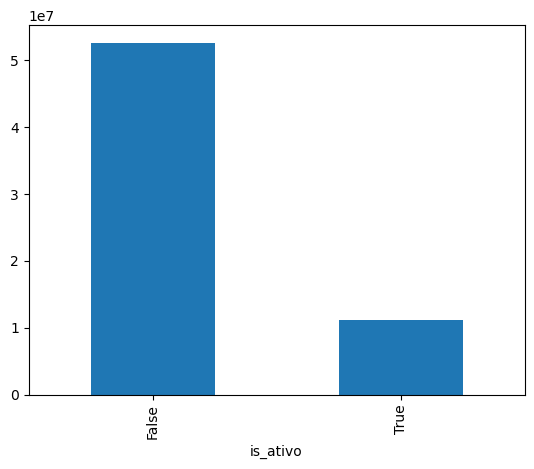

In [27]:
members_df.is_ativo.value_counts().plot.bar()

In [28]:
members_df.safra.describe()

count     63867246
unique          12
top         201612
freq       6287789
Name: safra, dtype: object

# User Logs

In [4]:
user_logs_df = DATA_LOADER.load_user_logs_df()

In [14]:
print(f'Rows qty: {len(user_logs_df)}')

Rows qty: 26758971


In [15]:
user_logs_df.dtypes

msno          object
safra          int32
num_25         int64
num_50         int64
num_75         int64
num_985        int64
num_100        int64
num_unq        int64
total_secs     int64
dtype: object

In [16]:
user_logs_df.head(10)

,msno,safra,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,SwlrSivYHoKF9V5wm1YYYAnjHpd9y3OPjI9rDUhGJ3k=,201701,121,28,14,29,704,827,184606
1,rE5wSmHEF1Dhu55zhkiGB1HvotdlSHcIMGXv6VcqO2A=,201605,26,2,5,6,462,256,119439
2,hx+cyaQ/Jcdr/Z5foa/Cn0PXUzC/F7QO/NQvWQS1Qtc=,201611,161,71,49,34,668,891,204791
3,53QW6B70J23X2UCvxaaUppjyE0b6X9nzP79W4huZv+Q=,201502,37,9,3,9,408,447,101186
4,/0S1N/oRyxGLZlzxnW5rOjfo0ZAls9EH23ahuDNuqz8=,201506,205,49,23,21,225,489,69957
5,qB/zteXKaOk3hzFCoIUD6wrTp57hnreDX4Vvon25MfM=,201509,52,10,10,20,308,264,81703
6,7btpXOqzA1ggOggSW81L05zDYyDjO7dXgmwZVzYmI2Q=,201610,159,53,30,43,1075,881,305353
7,kgEhriAqTydVKQ1xn+ZzKQzf4sQ1aod5zcEg5ksyWrE=,201609,88,13,14,13,588,325,159511
8,8uQ6M7OzdWsuzo0BRZ6siIPZfBoG43bRvlm+My36B6k=,201509,62,27,15,6,1389,1427,324691
9,T2gUhlBhFMoSFA9jFI/BkuyE/EPA6oneabYQiGBy9wU=,201702,36,23,5,9,216,241,56296


In [ ]:
# # Checking if all float fields are, actually, integers
# cols = [
#     'num_25',
#     'num_50',
#     'num_75',
#     'num_985',
#     'num_100',
#     'num_unq',
#     'total_secs',
# ]
# for c in cols:
#     is_int = check_if_float_field_is_integer(user_logs_df, c)
#     print(f'Col {c} is actually integer? {is_int}')
    
#     if is_int:
#         print(f'Converting to integer')
#         user_logs_df[c] = user_logs_df[c].astype(int)

Col num_25 is actually integer? True
Converting to integer
Col num_50 is actually integer? True
Converting to integer
Col num_75 is actually integer? True
Converting to integer
Col num_985 is actually integer? True
Converting to integer
Col num_100 is actually integer? True
Converting to integer
Col num_unq is actually integer? True
Converting to integer
Col total_secs is actually integer? False


In [9]:
user_logs_df.dtypes

msno           object
safra           int32
num_25          int64
num_50          int64
num_75          int64
num_985         int64
num_100         int64
num_unq         int64
total_secs    float64
dtype: object

In [10]:
user_logs_df.num_25.value_counts()

num_25
0       1381992
1       1175935
2        849489
3        685660
4        581587
         ...   
4467          1
5792          1
3877          1
6233          1
6277          1
Name: count, Length: 4891, dtype: int64

In [ ]:
user_logs_by_user = user_logs_df.groupby('msno')

In [10]:
def preferred_listen_time_calc(row: pd.Series):
    columns = ['num_25', 'num_50', 'num_75', 'num_985', 'num_100']
    values = list(
        map(
            lambda c: row[c], columns
        )
    )

    print(row)
    print(row['num_25'])
    print(values)
    max_val = max(values)

    for c in columns:
        if row[c] == max_val:
            return c.replace('num_', '')

    return '?'


user_logs_by_user['preferred_listen_time'] = user_logs_by_user.apply(
    preferred_listen_time_calc
)

: 

In [ ]:
user_logs_by_user.head()

([<matplotlib.axis.YTick at 0x7f28e070e0f0>,
 [Text(0, 0, '0.000'),
  Text(0, 1, '0.000'),
  Text(0, 100, '0.000'),
  Text(0, 1000, '0.001'),
  Text(0, 1000000, '1.000')])

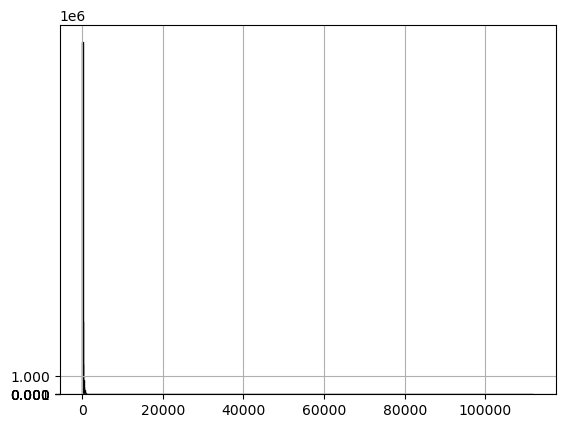

In [17]:
# Plot histogram with bins of 10,000
# Add labels and title
steps = 100
user_logs_df['num_25'].hist(
    bins=range(0, user_logs_df['num_25'].max(), steps),
    edgecolor='black'
)

# plt.xlabel('Value Ranges')
# plt.ylabel('Count')
# plt.title('Count of Values in Each 10,000 Range Bin')
# plt.xticks(range(0, user_logs_df['num_25'].max() + steps, steps))
# plt.show()